In [46]:
import altair as alt

import pandas as pd

TODO:

* Put TOC at strategic points in presentation to show audience where we are
* Finish TOC and give it right level of detail at each point
* Finish final part of lecture
* Tools

# Contents
* Introduction
    * Why data visualization?
    * What is data visualization?
* Grammar of graphics:
    1. Data
    2. Transformations
    3. Marks
    4. Encodings
    5. Scales
    6. Guides
* Creating an effective visualization
    * Effective in terms of
    * human perception and data (type)
    * research question
    * audience/framing

    
    


# Why data visualization?

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/why_data_viz.png?raw=true">

# What is data visualization?

A graphical representation of the data.

Data are **encoded** into a visual representation that *yields intuition*. Data are represented by **marks**, and **scales** map encodings to values.

## Florence Nightingale: Diagram of the causes of mortality in the army in the East (1858)

<img src="https://images.squarespace-cdn.com/content/v1/571a9b3cd51cd4f1ca1c03b5/1560869294779-VZJUB6GPGL32CDO0IPIJ/Nightingale-mortality.jpg?format=1000w">

## John Snow: Cholera outbreak London (1854)

[source](https://www.visualcapitalist.com/wp-content/uploads/2018/04/data-viz-cholera.html)

<img src="http://www.visualcapitalist.com/wp-content/uploads/2018/04/john-snow-cholera-map-huge.jpg">

# Grammar of graphics

Let's review that definition:

Data are **encoded** into a visual representation that *yields intuition*. Data are represented by **marks**, and **scales** map encodings to values.

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/grammar_of_graphics.png?raw=true">

Let's get acquainted with these terms...

## Data (1/6)

This one is as straightforward as it sounds, it is your dataset! The row index, the columns, and the values themselves.

For illustration purposes, we will use a dataset we know by heart.

In [47]:
titanic = pd.read_csv('https://raw.githubusercontent.com/NHameleers/dtz2025-datasets/master/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Transformation (2/6)

A transformation of the data before visualizing it.

Many different types:
* Aggregate transformations, such as mean(), sum()
* Bin transformations, like we binned age with pd.qcut()
* Filter transformations, like we selected a subset of rows where Pclass == 1
* [And many more](https://altair-viz.github.io/user_guide/transform/index.html)

In [48]:
# an aggregate transformation example
titanic.groupby(['Pclass', 'Sex']).mean()['Survived']


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## Marks (3/6)

This one was in the definition! *Data are represented by marks*

Getting acquainted is best done by showing some examples.

**Mark point**: data are represented by points


In [49]:
alt.Chart(titanic).mark_point().encode(
    x='Sex',
    y='mean(Survived)',
    column='Pclass'
)

alt.Chart(...)

**Mark bar**: data are represented by bars

In [50]:
alt.Chart(titanic).mark_bar().encode(
    x='Sex',
    y='mean(Survived)',
    column='Pclass'
)

alt.Chart(...)

**Mark line**

In [51]:
alt.Chart(titanic).mark_line().encode(
    x='Sex',
    y='mean(Survived)',
    column='Pclass'
)

alt.Chart(...)

**Mark rectangle**

In [52]:
alt.Chart(titanic).mark_rect().encode(
    x='Pclass:O',
    y='Sex',
    color='mean(Survived)',
)

alt.Chart(...)

## Encoding (4/6)

In the definition: *Data are **encoded** into a visual representation that *yields intuition*.

How can data be encoded?
* 2D position
* Size
* Color value
* Color hue
* Shape
* Texture

Let's take a closer look at this

**2D position**

This one is so obvious we might even overlook it, but the horizontal and vertical position of the data mark intuitively tells us something. So 2D position can translate to:
* x-axis
* y-axis

In the graph below:
* Proportion survived is encoded to the **y-axis**
* Sex is encoded to the **x-axis**

In [53]:
alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    x='Sex',
)

alt.Chart(...)

But we can also split the graph further using 2D position. This is called faceting.

Like using columns (or rows) to encode data on Pclass.


In the graph below:
* Proportion survived is encoded to the y-axis
* Sex is encoded to the x-axis
* Pclass is encoded to **facet column**

In [54]:
alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O'
)

alt.Chart(...)

**Size**

In the graph below:
* Proportion survived is encoded to the y-axis
* Sex is encoded to the x-axis
* Pclass is encoded to facet column
* Number of passengers is encoded to **size of mark**

In [55]:
alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O',
    size='count()'
)

alt.Chart(...)

**Color value**

In the graph below:
* Proportion survived is encoded to **color value**
* Sex is encoded to the y-axis
* Pclass is encoded to x-axis


In [56]:
alt.Chart(titanic).mark_rect().encode(
    x='Pclass:O',
    y='Sex',
    color='mean(Survived)',
)

alt.Chart(...)

**Color hue**

In the graph below:
* Proportion survived is encoded to the y-axis
* Sex is encoded to the x-axis **and color hue**
* Pclass is encoded to facet column

In [57]:
alt.Chart(titanic).mark_bar().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O',
    color='Sex'
)

alt.Chart(...)

**Shape**

In the graph below:
* Proportion survived is encoded to the y-axis
* Sex is encoded to **shape of mark**
* Pclass is encoded to facet column

In [58]:
alt.Chart(titanic).mark_point().encode(
    y='mean(Survived)',
    column='Pclass:O',
    shape='Sex'
)

alt.Chart(...)

## Scale (5/6)

Functions that map data to visual scales

Think of:
* Numbers to a number line
* The minimum and maximum of that line
* Float numbers mapped to integer axis
* Categories to different colors (female to blue, male to orange)

In [69]:
# axis can start at non-zero value

alt.Chart(titanic).mark_point().encode(
    alt.Y('count()'),
    x='Sex',
    color='Sex',
) | alt.Chart(titanic).mark_point().encode(
    alt.Y('count()', scale=alt.Scale(zero=False)),
    x='Sex',
    color='Sex',
)

alt.HConcatChart(...)

In [71]:
# or you can choose minimum and maximum yourself

alt.Chart(titanic).mark_point().encode(
    alt.Y('count()', scale=alt.Scale(domain=(250, 650))),
    x='Sex',
    color='Sex',
)

alt.Chart(...)

## Guide (6/6)

Visualization of scales (axes, legend, etc)

Without guides, a chart would be pretty hard to read...

In [87]:
alt.Chart(titanic).mark_point().encode(
    alt.Y('count()', axis=None),
    alt.X('Sex', axis=None),
    color=alt.Color('Sex', legend=None),
).properties(title='A chart without guides'
).configure_view(strokeOpacity=0)

alt.Chart(...)

In [88]:
alt.Chart(titanic).mark_point().encode(
    alt.Y('count()'),
    alt.X('Sex'),
    color=alt.Color('Sex'),
).properties(title='A chart with guides')


alt.Chart(...)

**Grammar of graphics in summary example**:

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/grammar_of_graphics_syntax.PNG?raw=true">

In [89]:
alt.Chart(titanic).mark_bar().encode(
    y='mean(Survived)',
    x='Sex',
    column='Pclass:O',
    color='Sex'
).properties(
    width=150,
    height=350
)

alt.Chart(...)

**A note on transformations**

You can do these:
1. **Before** the chart definition, using standard Pandas data transformations.
2. **Within** the chart definition, using Altair's syntax


Whichever you choose, try to realize and picture what happens in the data

For example:
* Aggregation transformation is like a `groupby`
* Filter transform is like selecting rows (e.g. with `.loc`)
* Bin transform is like binning a variable with `pd.qcut()`

# Making an effective visualisation

With so many options to choose from, how do we create an effective visualization?

The underlying question being:

_"Which encoding, mark, and scale are most effective?"_

Effective in terms of...?

* **human perception**

* **the data (type)**

* **the type of research question**

* **the audience and the message to convey**

## Human perception and data type

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/bertin_semiology.png?raw=true">

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/bertin_levels_of_organization.png?raw=true">

## Type of research question

We will elaborate on this during the practical. Questions can be related to themes such as:

1. Distribution
2. Ranking
3. Part of a whole
4. Evolution
5. Correlation
6. Geographic
7. Relations --> Network

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/question_to_viz1.png?raw=true">

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/question_to_viz2.png?raw=true">

## The audience and message to convey

Fellow scientists <--> Policymakers <--> Citizens reading the news

You can convey a lot of different messages with one dataset when being creative with scales and guides.

Just don't take the framing too far...

<img src="https://github.com/NHameleers/pythonprogrammingcoursefhml/blob/master/Lectures/Lecture11-DataVisualization/images/bad_viz_violent_crime.jpg?raw=true">

See https://viz.wtf/ for more examples of visualizations that make no sense

# Tools/modules

* Matplotlib
* Altair
* Other tools

## Matplotlib

<img src="">

[Matplotlib](https://matplotlib.org/) is a very extensive visualization module in python. It has been around for 19 years and is therefore a very mature and stable library.

Pros:
* Very flexible. You can adjust even the smallest detail in a visualization
* Used by pandas plotting
* Many predefined styles (including xkcd comic style!)

Cons:
* Can feel and look a bit arcane
* Interactivity is possible, but not always easy to implement
* You always need to mould your data in the shape the visualization requires

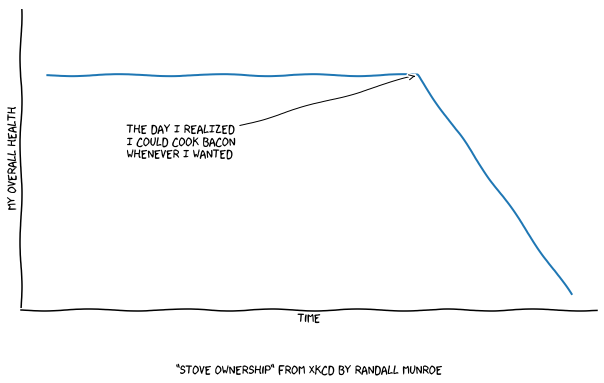

In [95]:
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines.right.set_color('none')
    ax.spines.top.set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

## Altair



[Altair](https://altair-viz.github.io/index.html) is a declarative statistical visualization library for Python, based on Vega and Vega-Lite (javascript visualization libraries). Altair’s API (syntax) is simple, friendly and consistent and built on top of the powerful Vega-Lite **visualization grammar.** 

Pros:
* The API/syntax corresponds to the grammar of graphics, which makes the programming intuitive and simpler
* Good default settings corresponding with data type
* Great features for interactivity

Cons:
* Does not handle large datasets well (since all the data are stored in json format in the image)
* Not every minor detail is customizable (altough in practice this might rarely be a problem)

## Other tools

There are a lot of visualization modules in python:
<img src="https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2018/04/Python_Visualization_Landscape.jpeg?w=452&ssl=1">

Beyond Python:
The Excels of data visualization (Tableau, Power BI, Qlik) allow for quick exploration of data for those who cannot program and are commonly used in business settings for analytics and dashboards.

Hans Rosling. Watch after lecture and which grammar of graphics elements you recognize.

Which encodings does he use

Which mark

Scale?

Data

Transformations

Guide?

https://www.youtube.com/watch?v=Z8t4k0Q8e8Y